Run the cell below if you are using Google Colab to mount your Google Drive in your Colab instance. Adjust the path to the files in your Google Drive as needed if it differs.

If you do not use Google Colab, running the cell will simply do nothing, so do not worry about it.

In [1]:
try:
    from google.colab import drive
    drive.mount('/content/drive/')
    %cd 'drive/My Drive/Colab Notebooks/04_Classification'
except ImportError as e:
    pass

# More Classification & Evaluation

In this exercise we will look at classification again and have a closer look at evaluation.

In [2]:
import pandas as pd
from sklearn import preprocessing

# load the data
iris = pd.read_csv("iris.csv")
iris_data = iris[['SepalLength','SepalWidth','PetalLength','PetalWidth']]

label_encoder = preprocessing.LabelEncoder()
iris_target = label_encoder.fit_transform(iris['Name'])

display(iris_data.head())
iris_target[:5]

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


array([0, 0, 0, 0, 0])

## Cross Validation

[Cross validation](https://scikit-learn.org/stable/modules/cross_validation.html) splits your dataset into n *folds* and then runs the learning and evaluation n times.
This gives you a better estimate of the actual performance of your classifier than a single train/test split.

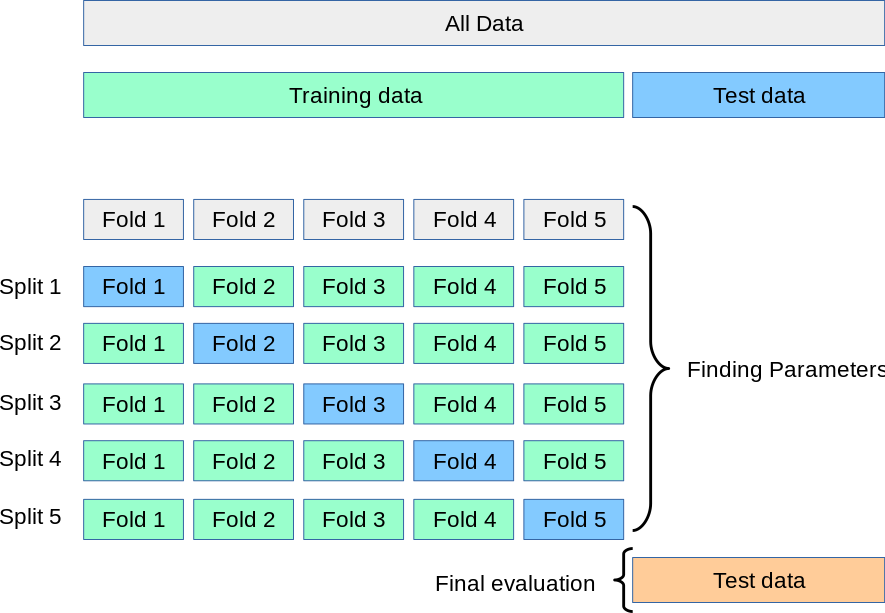

https://scikit-learn.org/stable/modules/cross_validation.html

You can evaluate any estimator with cross validation by importing the [```cross_val_score()``` function](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html).
You specify the [evaluation measure](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter) using the `scoring` parameter.
Possible values are 'accuracy', 'f1_micro', or 'f1_macro', etc.
The return value contains the score for every fold.

Note: The ```cross_val_score()``` function only evaluates the estimator on your dataset, it does not produce a model that you can apply!
To create such a model you must still call the ```fit()``` function of your estimator!

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
estimator = LogisticRegression(max_iter=200)

accuracy_iris = cross_val_score(estimator, iris_data, iris_target, cv=10, scoring='accuracy')

for i, acc in enumerate(accuracy_iris):
    print("Fold {}: Accuracy = {}%".format(i, acc * 100.0))

print("Average Accuracy = {}%".format(accuracy_iris.mean() * 100.0))

Fold 0: Accuracy = 100.0%
Fold 1: Accuracy = 93.33333333333333%
Fold 2: Accuracy = 100.0%
Fold 3: Accuracy = 100.0%
Fold 4: Accuracy = 93.33333333333333%
Fold 5: Accuracy = 93.33333333333333%
Fold 6: Accuracy = 93.33333333333333%
Fold 7: Accuracy = 100.0%
Fold 8: Accuracy = 100.0%
Fold 9: Accuracy = 100.0%
Average Accuracy = 97.33333333333334%


### Stratified Sampling in Cross Validation

You can control how the folds are created by changing the ```cv``` parameter.
Stratified sampling is implemented in the [```StatifiedKFold``` class](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html).

In [4]:
from sklearn.model_selection import StratifiedKFold

cross_val = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

accuracy_iris = cross_val_score(estimator, iris_data, iris_target, cv=cross_val, scoring='accuracy')
accuracy_iris.mean()

0.9666666666666668

### Obtaining predictions by cross-validation

If you want to analyse the predictions made during cross validation (for error analysis, you don't apply cross validation when actually applying the model!), you can use the [```cross_val_predict()``` function](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html).
Note: As the folds of a cross validation are non-overlapping, you get exactly one prediction for every example in your dataset.

In [5]:
from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(estimator, iris_data, iris_target, cv=10)

display(predicted)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Pipelines

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

transform = StandardScaler()
estimator = KNeighborsClassifier(n_neighbors=4)

# no data leakage in pipeline (test will be not transformed with scaler)
#-> pipeline is better 
pipeline = Pipeline([ ('normalisation', transform), ('classification', estimator) ])

accuracy_iris = cross_val_score(pipeline, iris_data, iris_target, cv=10, scoring='accuracy')

print("Average Accuracy = {}%".format(accuracy_iris.mean() * 100.0))

Average Accuracy = 94.66666666666667%


You can access the parameters of every element in the pipeline by using the name you assigned to the element, followed by ```'__'``` (two underscores!) and the name of the parameter.

The following code changes the ```n_neighbors``` parameter of the KNN classifier in our pipeline:

In [19]:
#change classifier parameters!
pipeline.set_params(classification__n_neighbors=1) 

accuracy_iris = cross_val_score(pipeline, iris_data, iris_target, cv=10, scoring='accuracy')

print("Average Accuracy = {}%".format(accuracy_iris.mean() * 100.0))

Average Accuracy = 95.71428571428571%


### [Mixed feature transformation in Pipelines](https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html)

If your dataset contains mixed feature types, you might want to apply different preprocessing steps to different sets of columns.
In this case, the [```ColumnTransformer``` class](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html) comes in handy.
It allows you to specify different pipelines for different sets of features that handle the preprocessing.

The following code example applies the ```StandardScaler``` to the features 'Temperature' and 'Humidity' and the ```OneHotEncoder``` to the features 'Outlook' and 'Wind':

In [20]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# load a dataset
golf = pd.read_csv('golf.csv')
golf_target = golf['Play']
golf = golf.drop(columns='Play')
display(golf.head())

# create the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        # use StandardScaler for Temperature and Humidity
        ('scaler', StandardScaler(), ['Temperature', 'Humidity']),
        # use OneHotEncoder for Outlook and Wind
        ('encoder', OneHotEncoder(), ['Outlook', 'Wind']) ])

# call fit_transform to see the result of applying the ColumnTransformer
preprocessed = pd.DataFrame(preprocessor.fit_transform(golf))
display(preprocessed.head())

# define a pipeline that contains the ColumnTransformer
pipeline = Pipeline([ ('preprocessing', preprocessor), ('classification', estimator) ])

# cross validate the pipeline
# NOTE: we pass the original datasets as parameters, the pipeline handles preprocessing!
accuracy = cross_val_score(pipeline, golf, golf_target, cv=2, scoring='accuracy')
display(accuracy.mean())

,Outlook,Temperature,Humidity,Wind
0,sunny,85.0,85.0,False
1,sunny,80.0,90.0,True
2,overcast,83.0,78.0,False
3,rain,70.0,96.0,False
4,rain,68.0,80.0,False


,0,1,2,3,4,5,6
0,1.804715,0.497155,0.0,0.0,1.0,1.0,0.0
1,1.015152,1.024440,0.0,0.0,1.0,0.0,1.0
2,1.488890,-0.241045,1.0,0.0,0.0,1.0,0.0
3,-0.563974,1.657183,0.0,1.0,0.0,1.0,0.0
4,-0.879799,-0.030131,0.0,1.0,0.0,1.0,0.0


0.5714285714285714

## Balancing

If the classes in your training set are highly imbalanced, this can affect the model that is learned, as a much higher importance is given to the frequent class (also called majority class).
To prevent this, you can use balancing to change the class distribution **on the training set** (and only there!).

Methods for balancing are provided by the [imblearn package](https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.pipeline.Pipeline.html):
- Undersampling of majority class: For example using the [```RandomUnderSampler``` class](https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.under_sampling.RandomUnderSampler.html)
- Oversampling of the minority class(es): For example using the [```RandomOverSampler``` class](https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.RandomOverSampler.html)

Every sampler from this package provides a ```fit_resample()``` function that balances the data.

To find out if your data is imbalanced, it can be useful to plot the class distribution:

In [9]:
# run this cell if the package is not installed
#%pip install -q -U imbalanced-learn

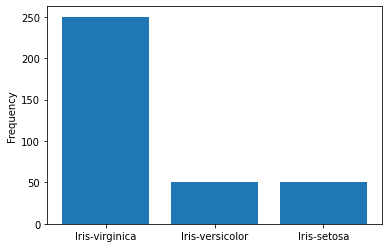

In [10]:
import matplotlib.pyplot as plt
#only balance training! not testing!

iris = pd.read_csv("iris_imbalanced.csv")
iris_data = iris[['SepalLength','SepalWidth','PetalLength','PetalWidth']]
iris_target = iris['Name']

class_dist = iris_target.value_counts()
plt.bar(class_dist.index, class_dist)
plt.ylabel("Frequency")
plt.show()

The plot shows that the class 'Iris-virginica' is much more frequent than the other two classes.
We can balance the data using undersampling of this majority class:

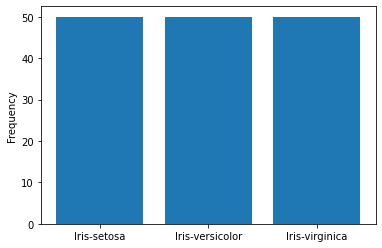

In [11]:
from imblearn.under_sampling import RandomUnderSampler
# larger class -> remove samples

sampler = RandomUnderSampler()
iris_balanced_data, iris_balanced_target = sampler.fit_resample(iris_data, iris_target)

class_dist = pd.Series(iris_balanced_target).value_counts()
plt.bar(class_dist.index, class_dist)
plt.ylabel("Frequency")
plt.show()

As an alternative to undersampling, we can also choose to oversample the minority classes:

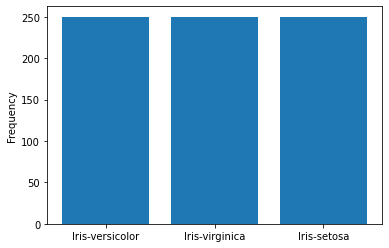

In [12]:
from imblearn.over_sampling import RandomOverSampler
# dublicate minority examples

sampler = RandomOverSampler()
iris_balanced_data, iris_balanced_target = sampler.fit_resample(iris_data, iris_target)

class_dist = pd.Series(iris_balanced_target).value_counts()
plt.bar(class_dist.index, class_dist)
plt.ylabel("Frequency")
plt.show()

### Pipelines with balancing

To support the balancing methods from the imblearn package, we must create a different type of pipeline:

In [13]:
from imblearn.pipeline import Pipeline #use different pipeline!

sampler = RandomUnderSampler()

pipeline = Pipeline([ ('normalisation', transform), ('balancing', sampler), ('classification', estimator) ])

accuracy_iris = cross_val_score(pipeline, iris_data, iris_target, cv=10, scoring='accuracy')

print("Average Accuracy = {}%".format(accuracy_iris.mean() * 100.0))

Average Accuracy = 95.14285714285714%


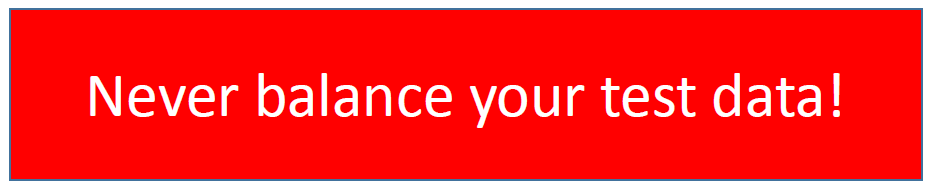

### Try it out
- Task 4.1.1
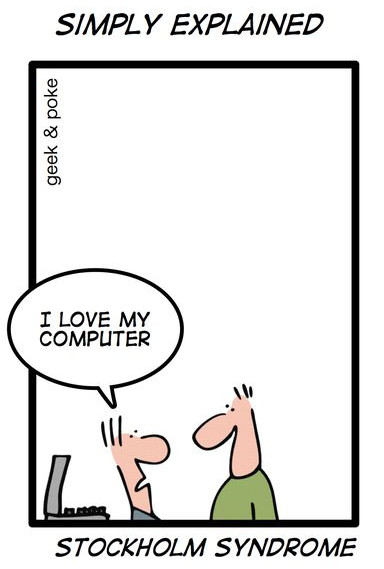
http://geek-and-poke.com/geekandpoke/2010/10/24/simply-explained.html

### Evaluation Measures: Precision and Recall
- Measure two aspects of the result for every class
- Precision: How many of the examples that were labelled “yes” are really “yes”?
    - “the number of correctly labelled examples divided by the number of all examples that were labelled with this class”
- Recall: How many of the examples that are really “yes” were labelled “yes’?
    - “the number of correctly labelled examples divided by the number of all examples that actually belong to this class”
    - **Fraud detection** - actually valid transaction maybe also in there
    - Improve recall by tuning model hyperparamaeter (class weights)
- F1 score: considers both precision and recall (harmonic mean) 

$Precision = \frac{TP}{TP+\textbf{FP}}$
$Recall = \frac{TP}{TP+\textbf{FN}}$

$F1 = \frac{2 * precicion * recall}{precision + recall}$

In [14]:
predicted = cross_val_predict(KNeighborsClassifier(), iris_data, iris_target, cv=10)

#support: how many examples

from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(iris_target, predicted, target_names=label_encoder.classes_))

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       1.00      0.90      0.95        50
 Iris-virginica       0.98      1.00      0.99       250

       accuracy                           0.99       350
      macro avg       0.99      0.97      0.98       350
   weighted avg       0.99      0.99      0.99       350



### Manual Cross Validation 
If you want to implement cross validation yourself, you can iterate over the folds manually:

In [15]:
# sometimes you have to use the raw array and not the pandas dataframe (access it with .values)
data = iris_data.values 
target = iris['Name']

estimator = LogisticRegression(max_iter=200)

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

for train_indices, test_indices in cv.split(data, target):
    #display(test_indices)
    
    train_data = data[train_indices]
    train_target = target[train_indices]
    
    estimator.fit(train_data, train_target)

    test_data = data[test_indices]
    test_target = target[test_indices]
    
    test_prediction = estimator.predict(test_data)
    #print(test_prediction)

## Visual Evaluation

To evaluate and compare different classifiers, it can be useful to look at the ROC Curves.
You can create these curves using the [```roc_curve()``` function](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html).
As the ROC Curves depend on the confidences of each prediction made by the classifier, you need to call the ```predict_proba()``` function, which returns the confidence values for each class, instead of the ```predict()``` function, which returns the actual prediction.

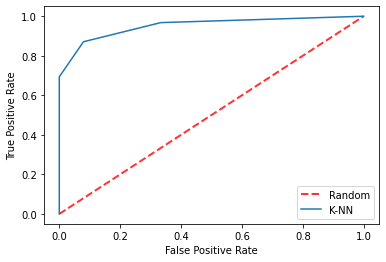

In [16]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# not only prediction but also confidence important!
# confidence from model (0.6 sure about class 1)

# sort prediction based on confidence
#    start bottom left
#    CORRECT go up - NOT CORRECT go to the right

# below line = all wrong classified

# load the dataset
data = pd.read_csv('weighting.csv')
target = data['weighting.dat (7)']
data = data.drop(columns='weighting.dat (7)')

# create the classifier
knn_estimator = KNeighborsClassifier(3)

# create a train/test split
data_train, data_test, target_train, target_test = train_test_split(data, target)

# fit to the training data
knn_estimator.fit(data_train, target_train)

# get the class probabilities (confidences) for the test set
proba_for_each_class = knn_estimator.predict_proba(data_test)

# calculate the ROC Curve
fpr, tpr, thresholds = roc_curve(target_test, proba_for_each_class[:,1], pos_label='positive')

# plot the line for random guessing
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random', alpha=.8)

# plot the ROC Curve for the classifier
plt.plot(fpr,tpr,label='K-NN')

# show the plot
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show() 

In [22]:
fpr

array([0.        , 0.        , 0.07936508, 0.33333333, 1.        ])

In [18]:
proba_for_each_class[:,1]

array([0.        , 0.66666667, 1.        , 1.        , 0.33333333,
       1.        , 1.        , 0.33333333, 0.        , 0.33333333,
       0.        , 1.        , 0.        , 0.66666667, 0.33333333,
       1.        , 1.        , 0.        , 0.        , 0.66666667,
       0.        , 0.33333333, 0.        , 1.        , 1.        ,
       1.        , 0.        , 1.        , 0.        , 1.        ,
       1.        , 0.33333333, 1.        , 1.        , 0.33333333,
       1.        , 1.        , 1.        , 1.        , 0.66666667,
       0.33333333, 0.        , 1.        , 1.        , 0.66666667,
       0.        , 1.        , 0.        , 0.33333333, 0.        ,
       0.33333333, 0.        , 0.        , 0.66666667, 0.        ,
       0.33333333, 0.33333333, 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 1.        ,
       0.        , 1.        , 1.        , 0.        , 1.        ,
       0.33333333, 1.        , 0.        , 0.66666667, 0.     

### ROC Curves with Cross Validation

To draw ROC Curves for the results of a cross validation, you can use the following function:

In [17]:
from numpy import interp
from sklearn.metrics import roc_curve, auc
import numpy as np

def avg_roc(cv, estimator, data, target, pos_label):
    mean_fpr = np.linspace(0, 1, 100) # = [0.0, 0.01, 0.02, 0.03, ... , 0.99, 1.0]
    tprs = []
    aucs = []    
    for train_indices, test_indices in cv.split(data, target):
        train_data, train_target = data[train_indices], target[train_indices]
        estimator.fit(train_data, train_target)
        
        test_data, test_target = data[test_indices], target[test_indices]
        decision_for_each_class = estimator.predict_proba(test_data)
        fpr, tpr, thresholds = roc_curve(test_target, decision_for_each_class[:,1], pos_label=pos_label)
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0 # tprs[-1] accesses the last element
        aucs.append(auc(fpr, tpr))
        # plt.plot(fpr, tpr)  # plot for each fold
        
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0 # set the last tpr to 1
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    return mean_fpr, mean_tpr, mean_auc, std_auc

You apply this function as follows:

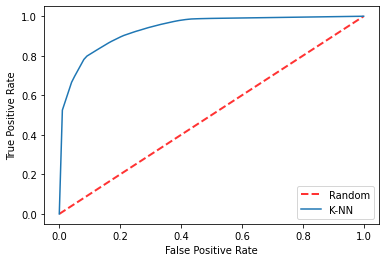

In [24]:
# the further to the top Left the better
# AOC = Area under ROC Curve -> bigger = better
# improving AOC -> imporving probability


# create the classifier
knn_estimator = KNeighborsClassifier(3)

# specify how to create the folds for the cross validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42, )

# run cross validation and calculate the ROC Curve
mean_fpr, mean_tpr, mean_auc, std_auc = avg_roc(cv, knn_estimator, data.values, target, 'positive')

# plot the line for random guessing
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random', alpha=.8)

# plot the ROC Curve for the classifier
plt.plot(mean_fpr, mean_tpr, label='K-NN')

# show the plot
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [24]:
target

0      negative
1      positive
2      negative
3      negative
4      negative
         ...   
495    negative
496    positive
497    positive
498    positive
499    negative
Name: weighting.dat (7), Length: 500, dtype: object

### Inspect intermediate results in Pipelines
It is sometimes useful to temporarily add a debugging step that prints out the information you are interested in.

In [26]:
from sklearn.base import TransformerMixin, BaseEstimator

class Debug(BaseEstimator, TransformerMixin):

    def transform(self, X):
        #TODO: define here your inspection code like printing the dataframe
        display(pd.DataFrame(X).head())
        return X

    def fit(self, X, y=None, **fit_params):
        return self

transform = StandardScaler()
estimator = KNeighborsClassifier()

# TODO: add a debug step in the pipeline
pipeline = Pipeline([ ('normalisation', transform), ('dbg', Debug()), ('classification', estimator)])
pipeline.fit(iris_data, iris_target);

,0,1,2,3
0,-1.445189,1.314887,-2.239014,-2.174681
1,-1.692471,-0.022157,-2.239014,-2.174681
2,-1.939754,0.512661,-2.305190,-2.174681
3,-2.063395,0.245252,-2.172838,-2.174681
4,-1.568830,1.582296,-2.239014,-2.174681


## Hyper-Parameter Tuning

### Grid Search

We perform the hyper-parameter tuning using [Grid Search](http://scikit-learn.org/stable/modules/grid_search.html).
A grid search allows you to specify all hyper-parameter values that you want to test, and will then evaluate all possible combinations of these values.
It is implemented in the [```GridSearchCV``` class](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) in scikit-learn.
This class behaves exactly like an estimator.
If its ```fit()``` function is called, all hyper-parameter combinations are evaluated.

Parameters:
- ```estimator```: an estimator (e.g. a decision tree)
- ```parameter_grid```: the parameters that should be evaluated as a dictionary
    - the key is the name of the hyper-parameter
    - the value is a list of possible values
    - example: ```{'param_a':[1,2,3], 'param_b':[7,8,9] }```
- ```scoring```: the metric that should be used to evaluate the parameter settings (can be 'accuracy' or other scores)
- ```cv```: specifies how to perform cross validation (default: 3-fold cross validation)

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

# create an estimator
knn_estimator = KNeighborsClassifier()

# specify the parameter grid
parameters = {
    'n_neighbors': range(2, 9)
}

# specify the cross validation
stratified_10_fold_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# create the grid search instance
grid_search_estimator = GridSearchCV(knn_estimator, parameters, scoring='accuracy', cv=stratified_10_fold_cv, return_train_score=False)

# run the grid search
grid_search_estimator.fit(iris_data,iris_target)

# print the results of all hyper-parameter combinations
results = pd.DataFrame(grid_search_estimator.cv_results_)
display(results)

# mean_test_score = accuracy
# print the best parameter setting
print("best score is {} with params {}".format(grid_search_estimator.best_score_, grid_search_estimator.best_params_))

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007300,0.003552,0.007799,0.003030,2,{'n_neighbors': 2},1.000000,1.000000,1.000000,1.0,0.971429,0.942857,1.000000,1.000000,1.000000,1.000000,0.991429,0.018295,1
1,0.004408,0.001281,0.006192,0.002468,3,{'n_neighbors': 3},1.000000,1.000000,1.000000,1.0,0.971429,0.942857,1.000000,1.000000,1.000000,1.000000,0.991429,0.018295,1
2,0.005603,0.004034,0.005897,0.003179,4,{'n_neighbors': 4},1.000000,1.000000,1.000000,1.0,0.971429,0.942857,1.000000,1.000000,1.000000,1.000000,0.991429,0.018295,1
3,0.004803,0.002224,0.005895,0.002216,5,{'n_neighbors': 5},1.000000,1.000000,0.971429,1.0,0.971429,0.942857,1.000000,1.000000,0.971429,1.000000,0.985714,0.019166,4
4,0.004089,0.000933,0.005199,0.001398,6,{'n_neighbors': 6},1.000000,1.000000,0.971429,1.0,0.971429,0.942857,1.000000,0.942857,0.971429,1.000000,0.980000,0.022315,6
5,0.003702,0.000644,0.005097,0.001043,7,{'n_neighbors': 7},1.000000,1.000000,0.971429,1.0,0.942857,0.942857,0.971429,1.000000,0.971429,1.000000,0.980000,0.022315,5
6,0.004001,0.000635,0.004398,0.000489,8,{'n_neighbors': 8},0.971429,0.971429,0.971429,1.0,0.942857,0.942857,0.942857,1.000000,0.971429,0.971429,0.968571,0.020000,7


best score is 0.9914285714285714 with params {'n_neighbors': 2}


## Grid Search using Pipelines

Often, we need preprocessing steps before we perform a grid search, or even want to optimise the hyper-parameters of our preprocessing steps.
In these cases, we set up a pipeline and run the grid search on all steps.

You can modify the parameter of the pipeline by attributes named `{name of the pipeline step}__{parameter of the pipeline step}`

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# create the pipeline
transform = StandardScaler()
estimator = KNeighborsClassifier()
pipeline = Pipeline(steps=[ ('normalisation', transform), ('classification', estimator) ])


# specify the parameter grid
parameters = {
    'normalisation__with_mean': [ True, False],
    'normalisation__with_std': [ True, False],
    'classification__n_neighbors': range(2, 6)
}

# create the grid search instance
grid_search_estimator = GridSearchCV(pipeline, parameters, scoring='accuracy', cv=10)

accuracy_best = cross_val_score(grid_search_estimator, iris_data, iris_target, cv=5, scoring='accuracy', n_jobs=-1)
print("Accuracy = {}%".format(accuracy_best.mean() * 100.0))

grid_search_estimator.fit(iris_data, iris_target)
display(grid_search_estimator.best_params_)

Accuracy = 99.14285714285714%


{'classification__n_neighbors': 2,
 'normalisation__with_mean': True,
 'normalisation__with_std': False}

## Using Cost-Based Evaluation

If we are interested in a use-case specific evaluation, we can define a cost matrix and calculate the overall cost of our model.

In [30]:
import numpy as np
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix

# specify the order of the classes in the confusion matrix
label_order = [ 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica' ]

# define a cost matrix
#!cost associated to error
costs = [
            [ 0, 1, 2],
            [ 1, 0, 1],
            [ 2, 1, 0]
        ]

# define the cost function
def cost_function(y_true, y_pred): 
    cm = confusion_matrix(y_true, y_pred, labels=label_order)
    s = 0
    for i in range(len(cm)):
        s += np.dot(cm[i], costs[i])
    return s

# define a cost scorer
cost_score = make_scorer(cost_function, greater_is_better=False)

# create the grid search instance
grid_search_estimator = GridSearchCV(pipeline, parameters, scoring=cost_score, cv=10)

#scoring = define cost matrix
score_best = cross_val_score(grid_search_estimator, iris_data, iris_target, cv=5, scoring=cost_score, n_jobs=-1)
print("Cost = {}".format(-score_best.mean()))

grid_search_estimator.fit(iris_data, iris_target)
display(grid_search_estimator.best_params_)

Cost = 0.6


{'classification__n_neighbors': 2,
 'normalisation__with_mean': True,
 'normalisation__with_std': False}

## Loading Data (ARFF)

For one of the exercises, you need to load a .arff file.
You can load data in this format using scipy's [```loadarff``` function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.arff.loadarff.html).
This function returns a tuple of two elements:    
- ```data``` : The data of the arff file, accessible by attribute names.
- ```meta``` : Contains information about the arff file such as name and type of attributes, the relation (name of the dataset), etc…

After loading the data, you can create a dataframe by using the DataFrame() constructor:

In [31]:
# import arff from scipy
from scipy.io import arff

# load the .arff file
credit_arff_data, credit_arff_meta = arff.loadarff(open('credit-g.arff', 'r'))

# create a dataframe
credit_data = pd.DataFrame(credit_arff_data)

# show the first few records
credit_data.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,b'<0',6.0,b'critical/other existing credit',b'radio/tv',1169.0,b'no known savings',b'>=7',4.0,b'male single',b'none',...,b'real estate',67.0,b'none',b'own',2.0,b'skilled',1.0,b'yes',b'yes',b'good'
1,b'0<=X<200',48.0,b'existing paid',b'radio/tv',5951.0,b'<100',b'1<=X<4',2.0,b'female div/dep/mar',b'none',...,b'real estate',22.0,b'none',b'own',1.0,b'skilled',1.0,b'none',b'yes',b'bad'
2,b'no checking',12.0,b'critical/other existing credit',b'education',2096.0,b'<100',b'4<=X<7',2.0,b'male single',b'none',...,b'real estate',49.0,b'none',b'own',1.0,b'unskilled resident',2.0,b'none',b'yes',b'good'
3,b'<0',42.0,b'existing paid',b'furniture/equipment',7882.0,b'<100',b'4<=X<7',2.0,b'male single',b'guarantor',...,b'life insurance',45.0,b'none',b'for free',1.0,b'skilled',2.0,b'none',b'yes',b'good'
4,b'<0',24.0,b'delayed previously',b'new car',4870.0,b'<100',b'1<=X<4',3.0,b'male single',b'none',...,b'no known property',53.0,b'none',b'for free',2.0,b'skilled',2.0,b'none',b'yes',b'bad'


After inspecting the dataframe, we see that many values have a strange encoding.
This is because the scipy package loads all non-numeric values as bytes and does not interpret them as strings or other types.
This can be resolved by decoding the values using utf-8, which means that they are interpreted as strings:

In [28]:
# select all columns of type object
columns_with_binary_strings = credit_data.select_dtypes('object').columns.values

# decode the values of these columns using utf-8
credit_data[columns_with_binary_strings] = credit_data[columns_with_binary_strings].apply(lambda x: x.str.decode("utf-8"))

credit_data.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad
